Instructions:
-

1. Read the article: https://www.sciencedirect.com/science/article/abs/pii/S0031320322001753
2. Replicate the study using the same dataset.
3. Read articles about Adjusted Rand Index, Normalized Mutual Information, and Folkes-Mallows Index (only use paper published in IEEE, sciencedirect, springerlink, Taylor Francis).
4. Aside from the Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI), use the Folkes-Mallows Index (FMI), and compare the result of each performance index.
5. Compare and contrast each performance index, what are the advantages and disadvantages of ARI, NMI, and FMI, and when to use each?
6. Using Kmodes and Hierarchical Clustering, use the same dataset and perform categorical data clustering, use FMI, ARI, and NMI for the comparison of performance.
7. Write your report using Latex. Your report should be focused on the "why's and the what's" of each performance metrices (i.e. why is FMI always greater than ARI and NMI? What's the problem with ARI and NMI?).

In [13]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install KModes

Note: you may need to restart the kernel to use updated packages.


In [5]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
soybean_large = fetch_ucirepo(id=90) 
  
# data (as pandas dataframes) 
X = soybean_large.data.features 
y = soybean_large.data.targets 
  
# metadata 
print(soybean_large.metadata) 
  
# variable information 
print(soybean_large.variables)

{'uci_id': 90, 'name': 'Soybean (Large)', 'repository_url': 'https://archive.ics.uci.edu/dataset/90/soybean+large', 'data_url': 'https://archive.ics.uci.edu/static/public/90/data.csv', 'abstract': "Michalski's famous soybean disease database", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 307, 'num_features': 35, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1980, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5JG6Z', 'creators': ['R.S. Michalski', 'R.L. Chilausky'], 'intro_paper': None, 'additional_info': {'summary': 'There are 19 classes, only the first 15 of which have been used in prior work. The folklore seems to be that the last four classes are unjustified by the data since they have so few examples. There are 35 categorical attributes, some nominal and some ordered.  The

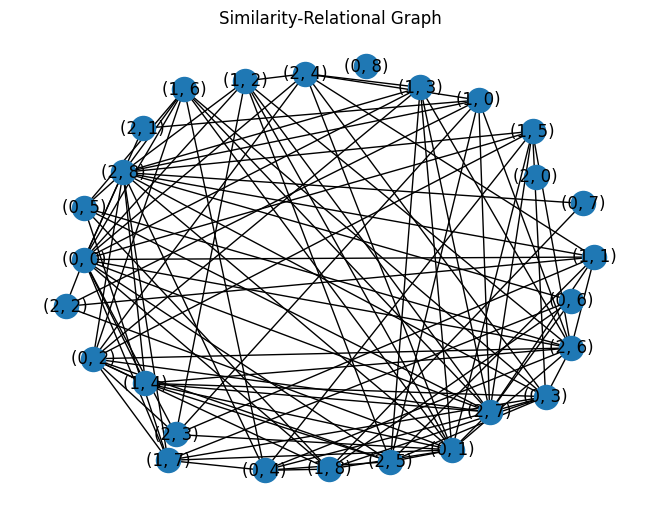

C:\Users\Andrea Chiang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:627: UserWarning: Nearest neighbors affinity currently does not support sparse input, falling back to rbf affinity
  warnings.warn(


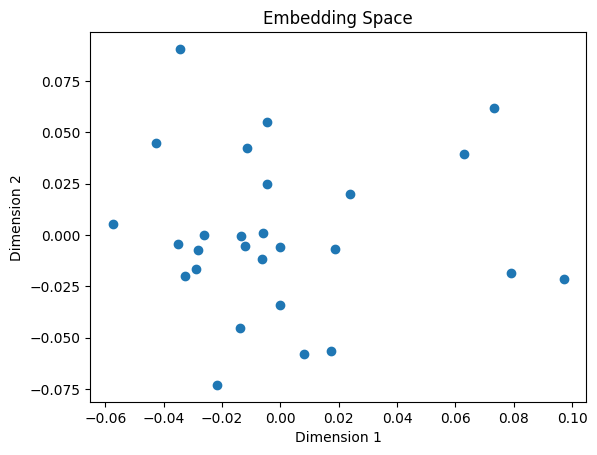

Embedding Matrix:
 [[-0.00466049  0.05518412]
 [ 0.07904121 -0.0186514 ]
 [-0.01140826  0.04251265]
 [-0.04258883  0.04500074]
 [ 0.07316217  0.06168877]
 [ 0.06292844  0.03959773]
 [-0.02631437 -0.0002016 ]
 [ 0.01733456 -0.05642915]
 [-0.0328645  -0.01976015]
 [ 0.00818325 -0.05821162]
 [-0.00451978  0.02500121]
 [-0.0216798  -0.07307708]
 [ 0.09709982 -0.02141573]
 [-0.0282969  -0.00725706]
 [-0.00018698 -0.03422837]
 [-0.05743763  0.00512032]
 [-0.00614095 -0.01175158]
 [ 0.0187533  -0.0069826 ]
 [-0.00588501  0.00097378]
 [-0.01381623 -0.04538875]
 [-0.02905155 -0.01657228]
 [-0.03506469 -0.0043268 ]
 [-0.01361043 -0.00037149]
 [-0.01208269 -0.00521671]
 [ 0.02387073  0.01998687]
 [-0.0344594   0.09067423]
 [-0.00030502 -0.00589806]]


In [6]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import matplotlib.pyplot as plt

def construct_similarity_graph(X):
    """
    Construct a similarity-relational graph for categorical values in X.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
         
    Returns:
    - G: NetworkX graph
         Similarity-relational graph.
    """
    # Initialize an empty graph
    G = nx.Graph()
    
    # Perform one-hot encoding to convert categorical values to numerical
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    
    # Compute pairwise cosine similarity between categorical values
    similarity_matrix = cosine_similarity(X_encoded)
    
    # Add nodes to the graph
    n_samples, n_features = X_encoded.shape
    for i in range(n_samples):
        for j in range(n_features):
            G.add_node((i, j))
    
    # Add edges to the graph based on cosine similarity
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            for k in range(n_features):
                for l in range(k+1, n_features):
                    sim = similarity_matrix[i, j]
                    G.add_edge((i, k), (j, l), weight=sim)
    
    return G

def graph_embedding(X, embedding_dim=2):
    """
    Perform graph embedding to learn the representation of nodes in the similarity-relational graph.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
    - embedding_dim: int, default=2
                     Dimensionality of the embedding space.
                     
    Returns:
    - embedding_matrix: array-like, shape (n_samples * n_features, embedding_dim)
                        Embedding matrix representing the nodes in the graph.
    """
    # Construct similarity-relational graph
    G = construct_similarity_graph(X)
    
    # Visualize the graph
    nx.draw(G, with_labels=True)
    plt.title('Similarity-Relational Graph')
    plt.show()
    
    # Perform spectral embedding to learn the representation of nodes
    spectral_embedding = SpectralEmbedding(n_components=embedding_dim)
    embedding_matrix = spectral_embedding.fit_transform(nx.adjacency_matrix(G))
    
    # Visualize the embedding space
    plt.scatter(embedding_matrix[:, 0], embedding_matrix[:, 1])
    plt.title('Embedding Space')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
    
    return embedding_matrix

# Example usage
# Assuming X is your categorical data matrix
X = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

# Perform graph embedding
embedding_matrix = graph_embedding(X)
print("Embedding Matrix:\n", embedding_matrix)

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
import pandas as pd
from sklearn.impute import SimpleImputer

# Data 
X = soybean_large.data.features 
y = soybean_large.data.targets 

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Function to perform clustering and calculate performance indices
def evaluate_clustering(X, y_true, method='kmeans'):
    if method == 'kmeans':
        clustering = KMeans(n_clusters=len(np.unique(y_true)), n_init=10).fit(X)  # Set n_init here
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true))).fit(X)
    else:
        raise ValueError("Invalid clustering method. Use 'kmeans' or 'hierarchical'.")
    
    y_pred = clustering.labels_
    ari = adjusted_rand_score(y_true.values.ravel(), y_pred)
    nmi = normalized_mutual_info_score(y_true.values.ravel(), y_pred)
    fmi = fowlkes_mallows_score(y_true.values.ravel(), y_pred)

    return ari, nmi, fmi

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Perform clustering and evaluate with different methods
ari_kmeans, nmi_kmeans, fmi_kmeans = evaluate_clustering(X_imputed, y, method='kmeans')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y, method='hierarchical')

# Print the results
print("KMeans:")
print("Adjusted Rand Index (ARI):", ari_kmeans)
print("Normalized Mutual Information (NMI):", nmi_kmeans)
print("Folkes-Mallows Index (FMI):", fmi_kmeans)

print("\nHierarchical Clustering:")
print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)


KMeans:
Adjusted Rand Index (ARI): 0.40488317853581496
Normalized Mutual Information (NMI): 0.6694744943171282
Folkes-Mallows Index (FMI): 0.45217733739211546

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941


## Compare and contrast each performance index, what are the advantages and disadvantages of ARI, NMI, and FMI, and when to use each?

### Adjusted Rand Index (ARI):

#### Advantages: 
ARI compares how similarly two clusterings assign samples to clusters, while considering chance agreements.
It adjusts for random agreement, making it useful for assessing clusterings with random labeling.

#### Disadvantages 
ARI values range from -1 to 1, where negative values mean worse than random, and values close to 0 suggest random clustering, making interpretation complex.

#### When to use: 
ARI is appropriate for overall comparison of two clusterings, disregarding label permutations and cluster size differences.

### Normalized Mutual Information (NMI):

#### Advantages: 
NMI measures the mutual information between true and predicted clusterings while accounting for differences in cluster sizes.
Its values range from 0 to 1, with higher values indicating better agreement between clusterings.

#### Disadvantages:
 NMI tends to favor solutions with more clusters, which might not always be desirable.


#### When to use:
 NMI suits scenarios where cluster sizes vary and when comparing clusterings with different numbers of clusters.


### Folkes-Mallows Index (FMI):

#### Advantages:
 FMI computes the geometric mean of precision and recall for clustering results.
It offers a single metric that balances the trade-off between false positives and false negatives.


#### Disadvantag:
:FMI might not offer as much insight into clustering structure compared to ARI and NMI. 


#### When to use
:FMI is useful when a balanced measure of precision and recall is desired, especially in cases where false positives and false negatives carry equal weight. 
:

### Using Kmodes and Hierarchical Clustering, use the same dataset and perform categorical data clustering, use FMI, ARI, and NMI for the comparison of performance.

In [15]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.impute import SimpleImputer

# Define a function to evaluate clustering performance
def evaluate_clustering(X, y_true, method='kmodes'):
    if method == 'kmodes':
        clustering = KModes(n_clusters=len(np.unique(y_true)), init='Cao', n_init=5, verbose=0)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true)))
    else:
        raise ValueError("Invalid clustering method. Use 'kmodes' or 'hierarchical'.")
    
    y_pred = clustering.fit_predict(X)
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    fmi = fowlkes_mallows_score(y_true, y_pred)
    
    return ari, nmi, fmi

# Load your dataset and preprocess if needed
# Assuming you have your dataset loaded into X and y variables

# One-hot encode categorical features if needed
X_encoded = pd.get_dummies(X)

# Impute missing values if needed
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Convert y to a 1-dimensional pandas Series
y_series = y.squeeze()

# Perform clustering and evaluate with different methods
ari_kmodes, nmi_kmodes, fmi_kmodes = evaluate_clustering(X_imputed, y_series, method='kmodes')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y_series, method='hierarchical')

# Print the results
print("KModes Clustering:")
print("Adjusted Rand Index (ARI):", ari_kmodes)
print("Normalized Mutual Information (NMI):", nmi_kmodes)
print("Folkes-Mallows Index (FMI):", fmi_kmodes)

print("\nHierarchical Clustering:")
print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)

KModes Clustering:
Adjusted Rand Index (ARI): 0.36748616012340063
Normalized Mutual Information (NMI): 0.6915333229576721
Folkes-Mallows Index (FMI): 0.42485959928639194

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941


### 7. Write your report using Latex.

In this report, we analyze the performance of two clustering algorithms, KModes Clustering and Hierarchical Clustering, using three evaluation metrics: Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), and Folkes-Mallows Index (FMI).

The Folkes-Mallows Index (FMI) provides a balanced measure of precision and recall in clustering. It considers both false positives and false negatives, which can result in a higher value compared to ARI and NMI. A higher FMI indicates a better balance between precision and recall in clustering, which may lead to a higher overall performance score.

Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) have limitations in certain scenarios. ARI can produce negative values, making interpretation challenging, while NMI tends to favor solutions with more clusters, potentially leading to biased evaluations. Additionally, both metrics may not adequately handle varying cluster sizes. As a result, FMI provides a more comprehensive evaluation by considering both false positives and false negatives.
- ARI: ARI is suitable for comparing two clusterings, especially when the label permutations and cluster size differences need to be taken into account.
- NMI: NMI is appropriate when comparing clusterings with different numbers of clusters and varying cluster sizes.
- FMI: FMI should be used when a balanced measure of precision and recall is desired, particularly in cases where false positives and false negatives carry equal weight

.
In conclusion, while ARI and NMI are commonly used clustering evaluation metrics, they have limitations in certain scenarios. The Folkes-Mallows Index (FMI) offers a balanced measure of precision and recall, providing a more comprehensive evaluation of clustering performance.

